# Reduccion de dimensiones

### PCA  (análisis de componente principal)

**PCA** es una transformación lineal usada para reducir dimensiones en los datos.

¿Por qué reducir dimensiones?

Existen varias razones, entre ellas:
+ Mejora de la performance
+ Mejor manejo de la dispersión de los datos
+ Maldición de las dimensiones (ojo-también existe la bendición)
+ etc...


Hay dos maneras diferentes de hacer ésta transformación:

+ A través de la matriz de correlaciones (dimensiones no homogéneas)
+ A través de la matriz de covarianzas (dimensiones homogéneas)

Ambas matrices son simétricas y diagonalizables. De hecho, el Teorema Espectral dice que si una matriz es hermítica, cuadrada y de dimensión finita, entonces existe una base de vectores propios donde dicha matriz puede ser representada.
Esto quiere decir que podemos cambiar de base para después proyectar, reduciendo las dimensiones e intentando conservar la máxima información en el nuevo subespacio.

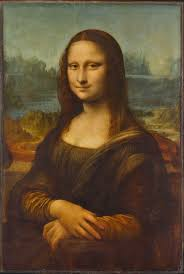

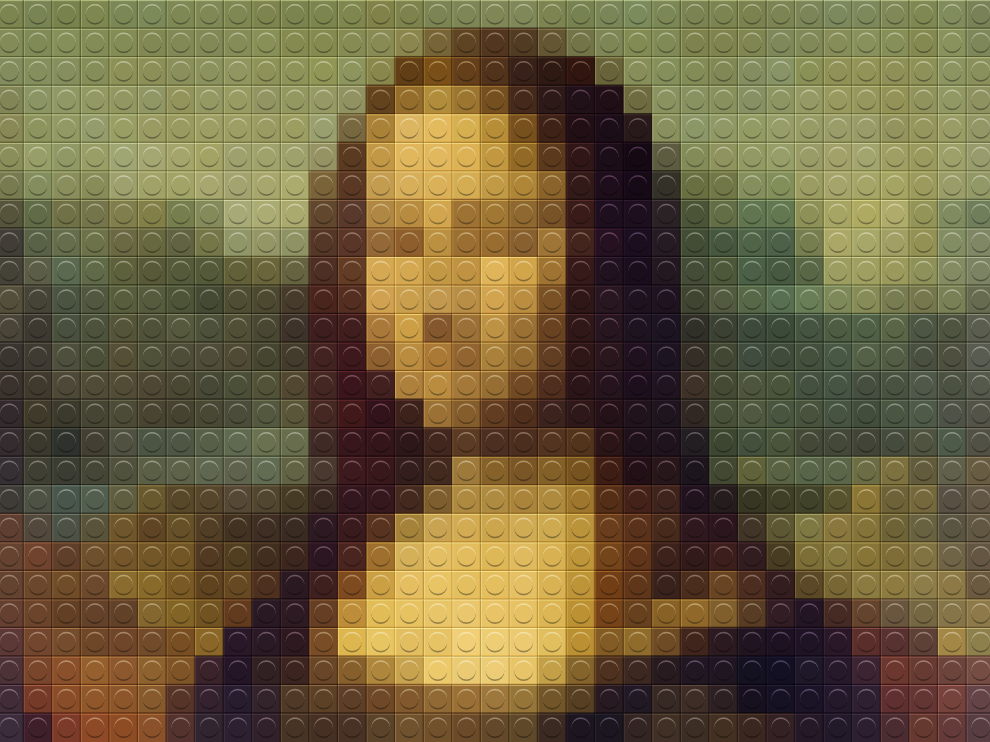

#### Ejemplo intuitivo

In [1]:
import pylab as plt
%matplotlib inline

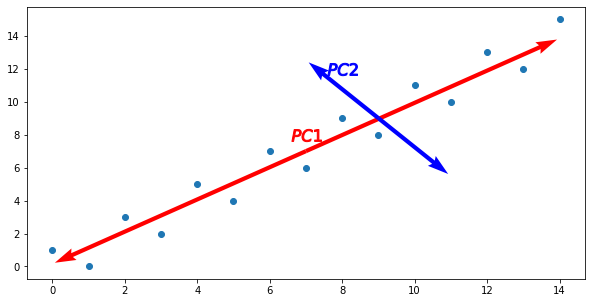

In [2]:
plt.figure(figsize=(10, 5))
plt.scatter([i for i in range(15)],
            [i+1 if i%2==0 else i-1 for i in range(15)])

plt.quiver(7, 7, 9, 4, color='r', scale=20)
plt.quiver(7, 7, -9, -4, color='r', scale=20)
plt.plot(7, 8, marker='$PC1$', ms=30, color='r')

plt.quiver(9, 9, -5, 4, color='b', scale=40)
plt.quiver(9, 9, 5, -4, color='b', scale=40)
plt.plot(8, 12, marker='$PC2$', ms=30, color='b');

Se rota y se proyecta, resultando:

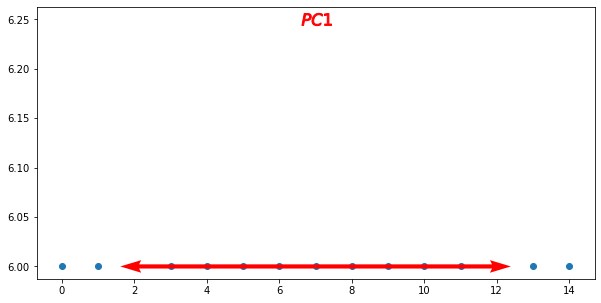

In [3]:
plt.figure(figsize=(10, 5))
plt.scatter([i for i in range(15)],
            [6 for i in range(15)])

plt.quiver(7, 6, 7, 0, color='r', scale=20)
plt.quiver(7, 6, -7, 0, color='r', scale=20)
plt.plot(7, 6.25, marker='$PC1$', ms=30, color='r');

**Combinacion lineal**

$v1>$ vector 1

$v2>$ vector 2

comb lineal = 2·$v1$ - 4·$v2$

**Combinacion no lineal**

comb no lineal = 2·$v1$·$v2$

##### Resumen PCA

+ Normalización de los datos
+ Obtener base de vectores propios desde matriz de correlacion o covarianza
+ Ordenar los vectores propios de mayor a menor según sus dimensiones en el nuevo subespacio
+ Matriz de proyección, con los autovectores seleccionados (W)
+ Se transforma X (los datos) según W (matriz de proyección)

In [4]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler  # normalizacion

from sklearn.decomposition import PCA    # PCA

import warnings
warnings.simplefilter('ignore')

In [5]:
data=pd.read_csv('../Data/pulsar_stars.csv')

data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


**Definición de pulsar:** Un púlsar (del acrónimo en inglés de pulsating star, 'estrella pulsante') es una estrella de neutrones que gira muy rápido y que está altamente magnetizada. La emisión que detectamos en la Tierra de los púlsares es periódica, con intervalos de emisión cortos y regulares. La radiación es producida en los polos magnéticos, desde donde emana en haces muy delgados. Debido a que los haces de radiación están desalineados con el eje de rotación, un punto fijo en el espacio será brevemente iluminado por el haz de radiación sólo una vez por cada giro de la estrella (como ocurre con un faro)

https://es.wikipedia.org/wiki/P%C3%BAlsar

In [6]:
data=data.drop(columns=['target_class'])

#### normalización

Recordemos, el primer paso de PCA es la normalización de los datos. 

Primero, veamos la **estandarización**  ($N(\mu, \sigma)$):

$$\frac{x-\mu}{\frac{\sigma}{\sqrt{n}}}$$

In [7]:
data_n_mano=(data - np.mean(data))/np.std(data) # formula de standarscaler

data_n=StandardScaler().fit_transform(data)

np.sum(data_n_mano - data_n)

 Mean of the integrated profile                  0.0
 Standard deviation of the integrated profile    0.0
 Excess kurtosis of the integrated profile       0.0
 Skewness of the integrated profile              0.0
 Mean of the DM-SNR curve                        0.0
 Standard deviation of the DM-SNR curve          0.0
 Excess kurtosis of the DM-SNR curve             0.0
 Skewness of the DM-SNR curve                    0.0
dtype: float64

Ahora el **MinMax** :

$$\frac{x-min}{max-min}$$

In [8]:
data_mm_mano=(data - np.min(data))/(np.max(data) - np.min(data)) # formula min-max scaler

data_mm=MinMaxScaler().fit_transform(data)

np.sum(data_mm_mano - data_mm)

 Mean of the integrated profile                  1.568736e-13
 Standard deviation of the integrated profile    5.547781e-14
 Excess kurtosis of the integrated profile       1.874941e-13
 Skewness of the integrated profile              6.680697e-14
 Mean of the DM-SNR curve                       -4.945127e-15
 Standard deviation of the DM-SNR curve          1.535528e-13
 Excess kurtosis of the DM-SNR curve            -3.709463e-13
 Skewness of the DM-SNR curve                   -3.247218e-14
dtype: float64

Se usa la standarización:

In [9]:
data=StandardScaler().fit_transform(data)

In [19]:
data

array([[ 1.14931702,  1.33483164, -0.66956953, ..., -0.37062547,
        -0.07279778, -0.28743812],
       [-0.3341682 ,  1.80226533, -0.01178476, ..., -0.5889241 ,
         0.50442694,  0.21158145],
       [-0.31437216, -1.05332222, -0.14523256, ..., -0.23532816,
        -0.12599609, -0.39137346],
       ...,
       [ 0.3218423 ,  1.95621968, -0.2993338 , ...,  1.67156847,
        -1.28807874, -0.94133005],
       [ 0.13362759,  1.07450972, -0.26005007, ..., -0.66485697,
         0.37825656,  0.27584987],
       [-2.10576204,  5.73546965,  0.87267394, ...,  1.97154554,
        -2.19732744, -0.97105168]])

Se aplica **PCA**

In [10]:
pca=PCA()

pca.fit(data)

print(data.shape)

pca.explained_variance_ratio_

(17898, 8)


array([0.51675584, 0.26807564, 0.10116862, 0.0571781 , 0.03227836,
       0.01998491, 0.00255524, 0.00200328])

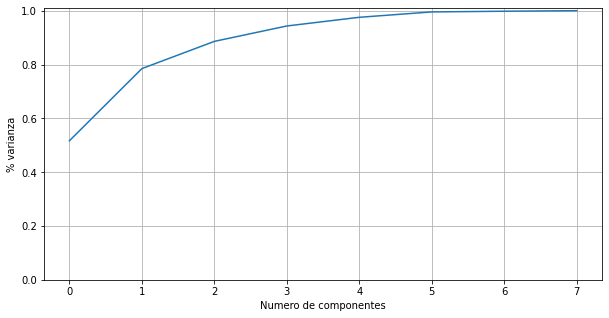

In [12]:
plt.figure(figsize=(10, 5))

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Numero de componentes')
plt.ylabel('% varianza')
plt.grid()
plt.ylim([0, 1.01]);

In [13]:
pca=PCA(n_components=4)

data_pca=pca.fit_transform(data)

df=pd.DataFrame(data_pca)

df.head()

,0,1,2,3
0,-1.278849,-1.273133,0.016213,0.662102
1,-1.020553,-0.201162,0.670478,1.605779
2,0.188289,0.432114,-0.979766,-0.519232
3,-1.015466,-1.469881,-0.018832,0.938386
4,-0.822626,2.123651,0.407953,-0.380922


In [14]:
sum(pca.explained_variance_ratio_)

0.9431781986997588

In [15]:
pd.DataFrame(data).head()

,0,1,2,3,4,5,6,7
0,1.149317,1.334832,-0.669570,-0.400459,-0.319440,-0.370625,-0.072798,-0.287438
1,-0.334168,1.802265,-0.011785,-0.370535,-0.371102,-0.588924,0.504427,0.211581
2,-0.314372,-1.053322,-0.145233,-0.116593,-0.322107,-0.235328,-0.125996,-0.391373
3,1.000694,1.553254,-0.513409,-0.390178,-0.304404,-0.275666,-0.312265,-0.481300
4,-0.871402,-0.858879,0.115609,-0.104866,-0.388010,-0.763111,1.324026,1.386794


In [16]:
pd.DataFrame(pca.inverse_transform(df)).head()

,0,1,2,3,4,5,6,7
0,0.726963,1.327427,-0.735075,-0.783587,-0.337221,-0.257022,-0.070554,-0.255592
1,-0.038332,1.811110,0.059444,-0.129622,-0.454226,-0.587282,0.417421,0.287539
2,-0.059363,-1.046436,-0.031402,0.033576,-0.428290,-0.159977,-0.140189,-0.349821
3,0.623153,1.549935,-0.607552,-0.691777,-0.309245,-0.172273,-0.269003,-0.486495
4,-0.366730,-0.849173,0.255278,0.285361,-0.451494,-0.797759,1.303397,1.398872


### UMAP (uniform manifold aprox and projection)

Tiene dos pasos:

+ KNN con pesos, según topología (grafo)
+ Se reduce la dimensión basándose en esa topología

https://umap-learn.readthedocs.io/en/latest/

In [ ]:
%pip install umap-learn

In [20]:
import umap

import seaborn as sns

from sklearn.datasets import load_iris

In [21]:
load_iris().data.shape

(150, 4)

In [22]:
reduc=umap.UMAP(n_components=2).fit_transform(load_iris().data)

reduc.shape

(150, 2)

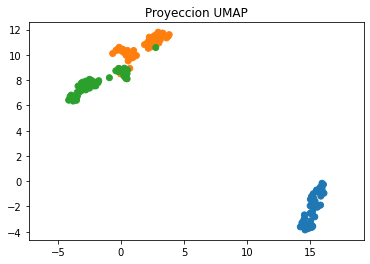

In [23]:
import pylab as plt

plt.scatter(reduc[:,0], # x
            reduc[:, 1],# y 
            c=[sns.color_palette()[x] for x in load_iris().target])


plt.gca().set_aspect('equal', 'datalim')
plt.title('Proyeccion UMAP');